### t2.micro, AWS Marketplace -> Anaconda with Python 3

### Machine Learning vs. Classical Linear Time Series Forecasting Methods

Machine learning methods can be used for classification and forecasting on time series problems.

Before exploring machine learning methods for time series, it is a good idea to ensure you have exhausted classical linear time series forecasting methods. Classical time series forecasting methods may be focused on linear relationships, nevertheless they are sophisticated and perform well on a wide range of problems, assuming that your data is suitably prepared and the method is well configured.

### Warning

Each code example is demonstrated on a simple contrived dataset that may or may not be appropriate for the method.  Replace the contrived dataset with your data in order to test the method.

Each method will require tuning to your specific problem.  Please review the tuning methodologies found in the Reference section of Statistical Methods for more information:  https://github.com/geoffreylink/Projects/tree/master/05%20Statistical%20Methods

### Autoregression (AR)

The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

The notation for the model involves specifying the order of the model p as a parameter to the AR function, e.g. AR(p). For example, AR(1) is a first-order autoregression model.

The method is suitable for univariate time series without trend and seasonal components.

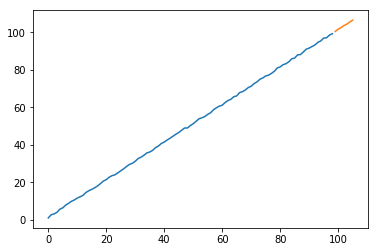

In [32]:
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR

data = [x + random() for x in range(1, 100)]

plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         AR(data).fit().predict(99, 105))

### Moving Average (MA)

The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.

A moving average model is different from calculating the moving average of the time series.

The notation for the model involves specifying the order of the model q as a parameter to the MA function, e.g. MA(q). For example, MA(1) is a first-order moving average model.

The method is suitable for univariate time series without trend and seasonal components.

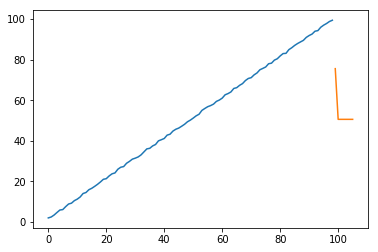

In [33]:
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

data = [x + random() for x in range(1, 100)]

plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         ARMA(data, order=(0, 1)).fit(disp=False).predict(99, 105))

### Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

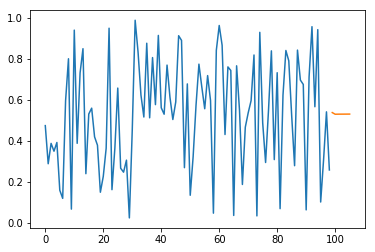

In [34]:
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

data = [random() for x in range(1, 100)]

plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         ARMA(data, order=(2, 1)).fit(disp=False).predict(99, 105))

### Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and resiudal errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

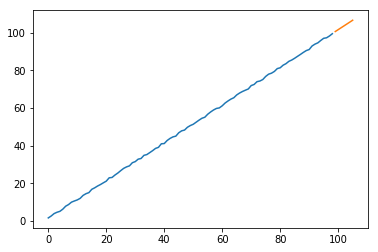

In [35]:
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

data = [x + random() for x in range(1, 100)]

plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         ARIMA(data, order=(1, 1, 1)).fit(disp=False).predict(99, 105, typ='levels'))

### Seasonal Autoregressive Integrated Moving-Average (SARIMA)

The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at prior time steps.

It combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function and AR(P), I(D), MA(Q) and m parameters at the seasonal level, e.g. SARIMA(p, d, q)(P, D, Q)m where “m” is the number of time steps in each season (the seasonal period). A SARIMA model can be used to develop AR, MA, ARMA and ARIMA models.

The method is suitable for univariate time series with trend and/or seasonal components.

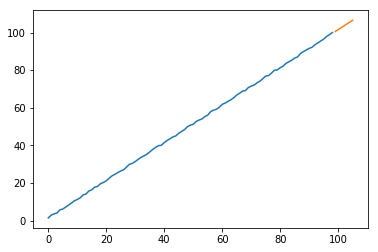

In [37]:
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = [x + random() for x in range(1, 100)]

plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 1)).fit(disp=False).predict(99, 105, typ='levels'))

### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)

The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that also includes the modeling of exogenous variables.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series may be referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The SARIMAX method can also be used to model the subsumed models with exogenous variables, such as ARX, MAX, ARMAX, and ARIMAX.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

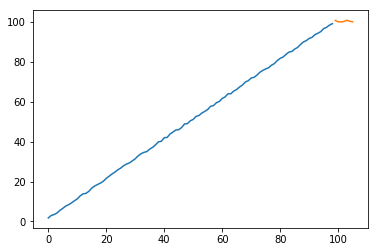

In [85]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data1 = [x + random() for x in range(1, 100)]
data2 = [x + random() for x in range(101, 200)]

plt.plot(data1)
exog2 = [
         [x + random() for x in range(200, 201)], 
         [x + random() for x in range(200, 201)],
         [x + random() for x in range(200, 201)],
         [x + random() for x in range(200, 201)],
         [x + random() for x in range(200, 201)],
         [x + random() for x in range(200, 201)],
         [x + random() for x in range(200, 201)]
        ]
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         SARIMAX(data1, exog=data2, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0)).fit(disp=False).predict(99, 105, exog=exog2))

### Vector Autoregression (VAR)

The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

The method is suitable for multivariate time series without trend and seasonal components.

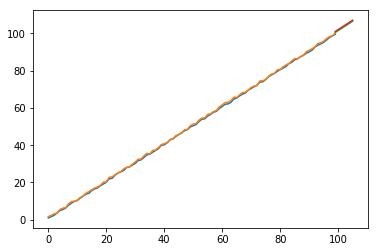

In [2]:
from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR

data = list()
for i in range(100):
    v1 = i + random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], [i for i in VAR(data).fit().forecast(VAR(data).y, steps=7).tolist()])

### Vector Autoregression Moving-Average (VARMA)

The Vector Autoregression Moving-Average (VARMA) method models the next step in each time series using an ARMA model. It is the generalization of ARMA to multiple parallel time series, e.g. multivariate time series.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to a VARMA function, e.g. VARMA(p, q). A VARMA model can also be used to develop VAR or VMA models.

The method is suitable for multivariate time series without trend and seasonal components.

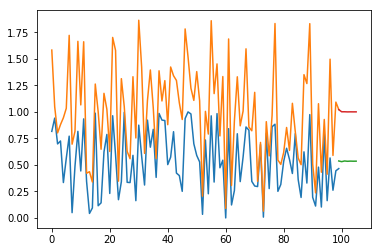

In [7]:
import warnings
warnings.filterwarnings("ignore")

from random import random
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX

data = list()
for i in range(100):
    v1 = random()
    v2 = v1 + random()
    row = [v1, v2]
    data.append(row)
plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], [i for i in VARMAX(data, order=(1, 1)).fit(disp=False).forecast(steps=7).tolist()])

### Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)

The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components and exogenous variables.

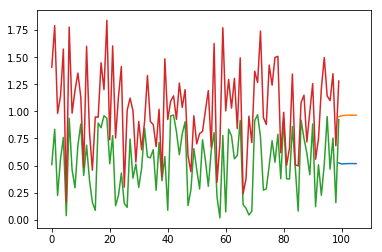

In [27]:
# VARMAX example
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency
data = list()
for i in range(100):
  v1 = random()
  v2 = v1 + random()
  row = [v1, v2]
  data.append(row)
data_exog = [x + random() for x in range(100)]
# fit model
# make prediction
data_exog2 = [[100],[101],[102],[103],[104],[105],[106]]
yhat = VARMAX(data, exog=data_exog, order=(1, 1)).fit(disp=False).forecast(exog=data_exog2, steps=7)

yhat = [i for i in VARMAX(data, exog=data_exog, order=(1, 1)).fit(disp=False).forecast(exog=data_exog2, steps=7).tolist()]


plt.plot([99, 100, 101, 102, 103, 104, 105], [i for i in VARMAX(data, exog=data_exog, order=(1, 1)).fit(disp=False).forecast(exog=data_exog2, steps=7).tolist()])
plt.plot(data)

### Simple Exponential Smoothing (SES)

The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps.

The method is suitable for univariate time series without trend and seasonal components.

[99.10365509 99.10365509 99.10365509 99.10365509 99.10365509 99.10365509
 99.10365509]


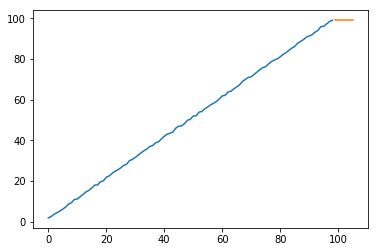

In [31]:
# SES example
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = SimpleExpSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(99, 105)
print(yhat)
plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         yhat)

### Holt Winter’s Exponential Smoothing (HWES)

The Holt Winter’s Exponential Smoothing (HWES) also called the Triple Exponential Smoothing method models the next time step as an exponentially weighted linear function of observations at prior time steps, taking trends and seasonality into account.

The method is suitable for univariate time series with trend and/or seasonal components.

[99.24437682 99.24437682 99.24437682 99.24437682 99.24437682 99.24437682
 99.24437682]


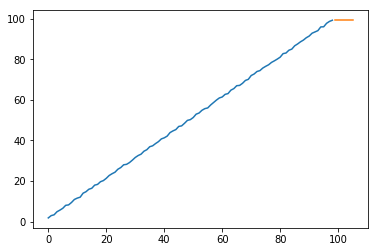

In [34]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(99, 105)
print(yhat)
plt.plot(data)
plt.plot([99, 100, 101, 102, 103, 104, 105], 
         yhat)